In [1]:
import os
import numpy as np
import pandas as pd
import subprocess

In [2]:
eqtl = pd.read_csv("/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/eQTL/microglia/chr12_z2.tsv", index_col=0, sep="\t|\s+", engine = 'python')


In [3]:
eqtl

,SNP,CHR,BP,A1,A2,Allele,beta_tissue_0,sd_tissue_0,z_tissue_0,beta_tissue_1,...,fixed_beta,fixed_sd,fixed_z,Random_Z,Fixed_P,Random_P,Fixed_bonf,Random_bonf,Fixed_FDR,Random_FDR
feature,,,,,,,,,,,,,,,,,,,,,
ENSG00000002016.18,chr12:28175:G:GT,chr12,28175,GT,G,GT,-0.030135,0.178350,-0.168965,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
ENSG00000060237.19,chr12:28175:G:GT,chr12,28175,GT,G,GT,-0.047778,0.076450,-0.624962,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
ENSG00000073614.13,chr12:28175:G:GT,chr12,28175,GT,G,GT,0.004010,0.091885,0.043644,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
ENSG00000082805.20,chr12:28175:G:GT,chr12,28175,GT,G,GT,0.098347,0.137518,0.715156,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
ENSG00000120645.12,chr12:28175:G:GT,chr12,28175,GT,G,GT,0.224148,0.286387,0.782674,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000247077.7,rs543367949,chr12,133263081,C,T,C,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
ENSG00000256223.6,rs543367949,chr12,133263081,C,T,C,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
ENSG00000278949.1,rs543367949,chr12,133263081,C,T,C,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [27]:
#thr_p = 1e-05
eqtl_interest = eqtl.loc[(eqtl.BP > 36270000) & (eqtl.BP < 38270000) ]

In [14]:
eqtl_interest.columns

Index(['SNP', 'CHR', 'BP', 'A1', 'A2', 'Allele', 'beta_tissue_0',
       'sd_tissue_0', 'z_tissue_0', 'beta_tissue_1', 'sd_tissue_1',
       'z_tissue_1', 'beta_tissue_2', 'sd_tissue_2', 'Z', 'beta_tissue_3',
       'sd_tissue_3', 'z_tissue_3', 'beta_tissue_4', 'sd_tissue_4',
       'z_tissue_4', 'beta_tissue_5', 'sd_tissue_5', 'z_tissue_5',
       'fixed_beta', 'fixed_sd', 'fixed_z', 'Random_Z', 'Fixed_P', 'Random_P',
       'Fixed_bonf', 'Random_bonf', 'Fixed_FDR', 'Random_FDR'],
      dtype='object')

In [20]:
eqtl_interest.sort_values('Fixed_P')

,SNP,CHR,BP,A1,A2,Allele,beta_tissue_0,sd_tissue_0,z_tissue_0,beta_tissue_1,...,fixed_beta,fixed_sd,fixed_z,Random_Z,Fixed_P,Random_P,Fixed_bonf,Random_bonf,Fixed_FDR,Random_FDR
feature,,,,,,,,,,,,,,,,,,,,,
ENSG00000175548.9,rs12425056,chr12,38154164,C,T,C,0.117998,0.160269,0.736249,0.286124,...,0.274168,0.072692,3.77164,3.77164,0.000162,0.000162,1.0,1.0,0.228189,0.087860
ENSG00000175548.9,rs139770209,chr12,37990962,C,G,C,0.117998,0.160269,0.736249,0.288795,...,0.275505,0.073604,3.74307,3.74307,0.000182,0.000182,1.0,1.0,0.228189,0.087860
ENSG00000175548.9,rs114945734,chr12,38011464,A,G,A,0.000000,0.000000,0.000000,-0.606342,...,-0.499116,0.133904,-3.72741,3.72741,0.000193,0.000193,1.0,1.0,0.228189,0.087860
ENSG00000175548.9,rs115959034,chr12,38012766,C,A,C,0.000000,0.000000,0.000000,-0.606342,...,-0.499116,0.133904,-3.72741,3.72741,0.000193,0.000193,1.0,1.0,0.228189,0.087860
ENSG00000139117.14,chr12:38220003:T:TA,chr12,38220003,TA,T,TA,0.279622,0.187699,1.489730,0.059750,...,0.354226,0.098276,3.60439,3.60439,0.000313,0.000313,1.0,1.0,0.258786,0.126444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000139117.14,rs11504383,chr12,37890968,C,G,C,-0.011285,0.217945,-0.051780,0.000000,...,0.000000,0.000000,0.00000,0.00000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
ENSG00000175548.9,rs11504383,chr12,37890968,C,G,C,-0.054552,0.358651,-0.152103,0.000000,...,0.000000,0.000000,0.00000,0.00000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
ENSG00000139117.14,rs12312211,chr12,37891378,A,C,A,-0.011285,0.217945,-0.051780,0.000000,...,0.000000,0.000000,0.00000,0.00000,1.000000,1.000000,1.0,1.0,1.000000,1.000000


<AxesSubplot:xlabel='CHR', ylabel='[Fixed_P]'>

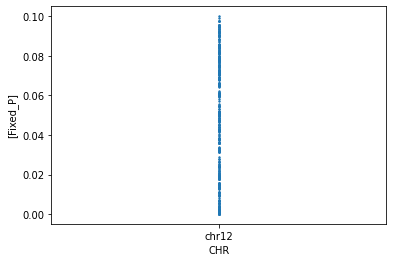

In [38]:
eqtl_interest[eqtl_interest.Fixed_P < 0.1].plot.scatter(1,['Fixed_P'], s = 2)

<AxesSubplot:>

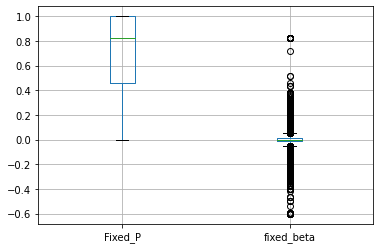

In [28]:
eqtl_interest.boxplot(column = ['Fixed_P','fixed_beta'])

In [21]:
eqtl_interest = eqtl.loc[(eqtl.BP > 37800000) & (eqtl.BP < 39000000) ]

In [22]:
eqtl_interest.sort_values('Fixed_P')

,SNP,CHR,BP,A1,A2,Allele,beta_tissue_0,sd_tissue_0,z_tissue_0,beta_tissue_1,...,fixed_beta,fixed_sd,fixed_z,Random_Z,Fixed_P,Random_P,Fixed_bonf,Random_bonf,Fixed_FDR,Random_FDR
feature,,,,,,,,,,,,,,,,,,,,,
ENSG00000173208.4,rs17460652,chr12,38597802,T,C,T,NaN,NaN,NaN,0.000000,...,-0.659872,0.174922,-3.77237,3.91307,0.000162,0.000091,1.0,0.753099,0.114968,0.032536
ENSG00000175548.9,rs12425056,chr12,38154164,C,T,C,0.117998,0.160269,0.736249,0.286124,...,0.274168,0.072692,3.77164,3.77164,0.000162,0.000162,1.0,1.000000,0.228189,0.087860
ENSG00000175548.9,rs139770209,chr12,37990962,C,G,C,0.117998,0.160269,0.736249,0.288795,...,0.275505,0.073604,3.74307,3.74307,0.000182,0.000182,1.0,1.000000,0.228189,0.087860
ENSG00000175548.9,rs115959034,chr12,38012766,C,A,C,0.000000,0.000000,0.000000,-0.606342,...,-0.499116,0.133904,-3.72741,3.72741,0.000193,0.000193,1.0,1.000000,0.228189,0.087860
ENSG00000175548.9,rs114945734,chr12,38011464,A,G,A,0.000000,0.000000,0.000000,-0.606342,...,-0.499116,0.133904,-3.72741,3.72741,0.000193,0.000193,1.0,1.000000,0.228189,0.087860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000139116.19,rs147432982,chr12,38450622,A,G,A,0.010204,0.235781,0.043279,0.000000,...,0.000000,0.000000,0.00000,0.00000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
ENSG00000139117.14,rs147432982,chr12,38450622,A,G,A,0.157820,0.217408,0.725917,0.000000,...,0.000000,0.000000,0.00000,0.00000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
ENSG00000175548.9,rs147432982,chr12,38450622,A,G,A,-0.162274,0.347929,-0.466400,0.000000,...,0.000000,0.000000,0.00000,0.00000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


In [9]:
genelist

Index(['ENSG00000175548.9', 'ENSG00000175548.9', 'ENSG00000175548.9',
       'ENSG00000175548.9', 'ENSG00000175548.9', 'ENSG00000175548.9',
       'ENSG00000175548.9', 'ENSG00000175548.9', 'ENSG00000175548.9',
       'ENSG00000175548.9',
       ...
       'ENSG00000139117.14', 'ENSG00000175548.9', 'ENSG00000139117.14',
       'ENSG00000175548.9', 'ENSG00000139117.14', 'ENSG00000175548.9',
       'ENSG00000139117.14', 'ENSG00000175548.9', 'ENSG00000139117.14',
       'ENSG00000175548.9'],
      dtype='object', name='feature', length=8542)

In [ ]:
thr_p = 1e-05
#top_assoc.loc[top_assoc.Random_P<thr_p].index

In [46]:
susie = pd.read_csv("/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/eQTL/microglia/chr21_susie_only.tsv", index_col=0, sep="\t|\s+", engine = 'python', header = None)

In [47]:
susie.columns = eqtl_interest.columns


,SNP,CHR,BP,A1,A2,Allele,beta_tissue_0,sd_tissue_0,z_tissue_0,beta_tissue_1,...,fixed_beta,fixed_sd,fixed_z,Random_Z,Fixed_P,Random_P,Fixed_bonf,Random_bonf,Fixed_FDR,Random_FDR
0,,,,,,,,,,,,,,,,,,,,,
ENSG00000142166.13,rs75100612,chr21,33567535,G,C,G,0.000000,0.000000,0.000000,0.206809,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
ENSG00000142188.17,rs75100612,chr21,33567535,G,C,G,0.000000,0.000000,0.000000,-0.405398,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
ENSG00000159079.19,rs75100612,chr21,33567535,G,C,G,0.000000,0.000000,0.000000,0.500006,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
ENSG00000159082.18,rs75100612,chr21,33567535,G,C,G,0.000000,0.000000,0.000000,0.062901,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
ENSG00000159086.15,rs75100612,chr21,33567535,G,C,G,0.000000,0.000000,0.000000,0.205856,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000234380.2,rs2142031,chr21,35566826,C,T,C,-0.089561,0.107715,-0.831461,-0.068374,...,-0.041549,0.047465,-0.875348,0.875348,0.381385,0.381385,1.0,1.0,1.000000,1.000000
ENSG00000236830.7,rs2142031,chr21,35566826,C,T,C,-0.203552,0.081438,-2.499470,-0.005017,...,-0.001320,0.037104,-0.035569,0.035569,0.971626,0.971626,1.0,1.0,1.000000,1.000000
ENSG00000273199.1,rs2142031,chr21,35566826,C,T,C,NaN,NaN,NaN,0.007531,...,0.133973,0.052316,2.560830,2.560830,0.010442,0.010442,1.0,1.0,0.345466,0.344330


In [53]:
print(len(susie.index.unique()))

print(len(susie[susie.Fixed_P < 1e-5].index.unique()))


53
5


In [58]:
susie.index.unique() ##53

Index(['ENSG00000142166.13', 'ENSG00000142188.17', 'ENSG00000159079.19',
       'ENSG00000159082.18', 'ENSG00000159086.15', 'ENSG00000159110.21',
       'ENSG00000159128.15', 'ENSG00000159131.17', 'ENSG00000159140.21',
       'ENSG00000159147.18', 'ENSG00000159200.18', 'ENSG00000177692.12',
       'ENSG00000180509.13', 'ENSG00000184221.13', 'ENSG00000198743.7',
       'ENSG00000205670.12', 'ENSG00000205726.15', 'ENSG00000205758.12',
       'ENSG00000205927.5', 'ENSG00000205930.10', 'ENSG00000223799.1',
       'ENSG00000227456.9', 'ENSG00000237945.7', 'ENSG00000238197.6',
       'ENSG00000241837.7', 'ENSG00000242220.9', 'ENSG00000243646.10',
       'ENSG00000243927.6', 'ENSG00000249624.10', 'ENSG00000265590.10',
       'ENSG00000288711.1', 'ENSG00000159197.4', 'ENSG00000205929.11',
       'ENSG00000215088.3', 'ENSG00000249209.2', 'ENSG00000159212.13',
       'ENSG00000234380.2', 'ENSG00000159216.19', 'ENSG00000286153.1',
       'ENSG00000223671.2', 'ENSG00000231106.2', 'ENSG00000185917.

In [61]:
susie_strict_p = susie[susie.Fixed_P < 1e-5]
susie_strict_p [['beta_tissue_0', 'beta_tissue_1', 'beta_tissue_2', 'beta_tissue_3', 'beta_tissue_4','beta_tissue_5']].isna().any()

beta_tissue_0    False
beta_tissue_1    False
beta_tissue_2    False
beta_tissue_3    False
beta_tissue_4    False
beta_tissue_5    False
dtype: bool

In [57]:
susie[susie.Fixed_P < 1e-5].index.unique()

Index(['ENSG00000159140.21', 'ENSG00000249624.10', 'ENSG00000142166.13',
       'ENSG00000234380.2', 'ENSG00000185917.14'],
      dtype='object', name=0)

In [62]:

eqtl = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/eQTL/microglia/gene/ENSG00000159140.21_sumstats_hg38.gz', sep = '\t') 


In [63]:
eqtl

,feature,variant_id,chr,pos,ref,alt,Allele,beta_tissue_0,sd_tissue_0,z_tissue_0,...,fixed_beta,fixed_sd,fixed_z,Random_Z,Fixed_P,Random_P,Fixed_bonf,Random_bonf,Fixed_FDR,Random_FDR
0,ENSG00000159140.21,rs2833873,chr21,32543161,A,G,A,0.112994,0.122311,0.923821,...,-0.088493,0.046223,-1.914470,1.914470,0.055560,0.055560,1.0,1.0,0.938954,0.927217
1,ENSG00000159140.21,rs141587873,chr21,32543244,T,C,T,0.053599,0.273129,0.196239,...,-0.097349,0.085925,-1.132960,1.132960,0.257231,0.257231,1.0,1.0,1.000000,1.000000
2,ENSG00000159140.21,rs111910098,chr21,32543454,A,G,A,0.041191,0.121468,0.339112,...,0.065073,0.057634,1.129060,1.129060,0.258873,0.258873,1.0,1.0,1.000000,1.000000
3,ENSG00000159140.21,rs7279318,chr21,32543499,T,C,T,0.089756,0.128748,0.697143,...,-0.080533,0.053722,-1.499070,1.499070,0.133855,0.133855,1.0,1.0,0.977479,0.974464
4,ENSG00000159140.21,rs7280523,chr21,32544160,A,G,A,0.112994,0.122311,0.923821,...,-0.088493,0.046223,-1.914470,1.914470,0.055560,0.055560,1.0,1.0,0.938954,0.927217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6951,ENSG00000159140.21,rs2154441,chr21,34575455,G,C,G,0.109165,0.088532,1.233060,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
6952,ENSG00000159140.21,rs715157,chr21,34575677,A,C,A,-0.096047,0.070327,-1.365720,...,-0.030855,0.034767,-0.887470,0.887470,0.374826,0.374826,1.0,1.0,1.000000,1.000000
6953,ENSG00000159140.21,rs76293118,chr21,34575744,T,C,T,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
6954,ENSG00000159140.21,rs1573465,chr21,34576900,C,T,C,-0.027805,0.074608,-0.372688,...,-0.022313,0.034798,-0.641215,0.641215,0.521383,0.521383,1.0,1.0,1.000000,1.000000


In [64]:
eqtl['check'] = eqtl['pos'].astype(str) + '_' + eqtl['ref'] + '_' + eqtl['alt']

In [74]:
eqtl[eqtl['pos'].duplicated()]

,feature,variant_id,chr,pos,ref,alt,Allele,beta_tissue_0,sd_tissue_0,z_tissue_0,...,fixed_sd,fixed_z,Random_Z,Fixed_P,Random_P,Fixed_bonf,Random_bonf,Fixed_FDR,Random_FDR,check
22,ENSG00000159140.21,rs57524613,chr21,32546968,G,GA,G,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,32546968_G_GA
40,ENSG00000159140.21,rs138102818,chr21,32549849,AGAG,A,AGAG,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,32549849_AGAG_A
91,ENSG00000159140.21,rs112587403,chr21,32558302,G,GACCCACCCATTGCAGTGAC,G,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,32558302_G_GACCCACCCATTGCAGTGAC
110,ENSG00000159140.21,rs79806630,chr21,32565136,AT,A,AT,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,32565136_AT_A
151,ENSG00000159140.21,rs36087958,chr21,32574158,AT,A,AT,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,32574158_AT_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6832,ENSG00000159140.21,rs150097572,chr21,34558627,C,CAACTT,C,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,34558627_C_CAACTT
6843,ENSG00000159140.21,rs5843672,chr21,34559414,CT,C,CT,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,34559414_CT_C
6861,ENSG00000159140.21,rs11334595,chr21,34562334,A,AT,A,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,34562334_A_AT
6899,ENSG00000159140.21,rs11358383,chr21,34566558,G,GA,G,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,34566558_G_GA


,feature,variant_id,chr,pos,ref,alt,Allele,beta_tissue_0,sd_tissue_0,z_tissue_0,...,fixed_sd,fixed_z,Random_Z,Fixed_P,Random_P,Fixed_bonf,Random_bonf,Fixed_FDR,Random_FDR,check
0,ENSG00000159140.21,rs2833873,chr21,32543161,A,G,A,0.112994,0.122311,0.923821,...,0.046223,-1.914470,1.914470,0.055560,0.055560,1.0,1.0,0.938954,0.927217,32543161_A_G
1,ENSG00000159140.21,rs141587873,chr21,32543244,T,C,T,0.053599,0.273129,0.196239,...,0.085925,-1.132960,1.132960,0.257231,0.257231,1.0,1.0,1.000000,1.000000,32543244_T_C
2,ENSG00000159140.21,rs111910098,chr21,32543454,A,G,A,0.041191,0.121468,0.339112,...,0.057634,1.129060,1.129060,0.258873,0.258873,1.0,1.0,1.000000,1.000000,32543454_A_G
3,ENSG00000159140.21,rs7279318,chr21,32543499,T,C,T,0.089756,0.128748,0.697143,...,0.053722,-1.499070,1.499070,0.133855,0.133855,1.0,1.0,0.977479,0.974464,32543499_T_C
4,ENSG00000159140.21,rs7280523,chr21,32544160,A,G,A,0.112994,0.122311,0.923821,...,0.046223,-1.914470,1.914470,0.055560,0.055560,1.0,1.0,0.938954,0.927217,32544160_A_G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6951,ENSG00000159140.21,rs2154441,chr21,34575455,G,C,G,0.109165,0.088532,1.233060,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,34575455_G_C
6952,ENSG00000159140.21,rs715157,chr21,34575677,A,C,A,-0.096047,0.070327,-1.365720,...,0.034767,-0.887470,0.887470,0.374826,0.374826,1.0,1.0,1.000000,1.000000,34575677_A_C
6953,ENSG00000159140.21,rs76293118,chr21,34575744,T,C,T,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,34575744_T_C
6954,ENSG00000159140.21,rs1573465,chr21,34576900,C,T,C,-0.027805,0.074608,-0.372688,...,0.034798,-0.641215,0.641215,0.521383,0.521383,1.0,1.0,1.000000,1.000000,34576900_C_T


In [75]:
eqtl[eqtl['variant_id'].str.startswith('rs')]

,feature,variant_id,chr,pos,ref,alt,Allele,beta_tissue_0,sd_tissue_0,z_tissue_0,...,fixed_sd,fixed_z,Random_Z,Fixed_P,Random_P,Fixed_bonf,Random_bonf,Fixed_FDR,Random_FDR,check
0,ENSG00000159140.21,rs2833873,chr21,32543161,A,G,A,0.112994,0.122311,0.923821,...,0.046223,-1.914470,1.914470,0.055560,0.055560,1.0,1.0,0.938954,0.927217,32543161_A_G
1,ENSG00000159140.21,rs141587873,chr21,32543244,T,C,T,0.053599,0.273129,0.196239,...,0.085925,-1.132960,1.132960,0.257231,0.257231,1.0,1.0,1.000000,1.000000,32543244_T_C
2,ENSG00000159140.21,rs111910098,chr21,32543454,A,G,A,0.041191,0.121468,0.339112,...,0.057634,1.129060,1.129060,0.258873,0.258873,1.0,1.0,1.000000,1.000000,32543454_A_G
3,ENSG00000159140.21,rs7279318,chr21,32543499,T,C,T,0.089756,0.128748,0.697143,...,0.053722,-1.499070,1.499070,0.133855,0.133855,1.0,1.0,0.977479,0.974464,32543499_T_C
4,ENSG00000159140.21,rs7280523,chr21,32544160,A,G,A,0.112994,0.122311,0.923821,...,0.046223,-1.914470,1.914470,0.055560,0.055560,1.0,1.0,0.938954,0.927217,32544160_A_G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6951,ENSG00000159140.21,rs2154441,chr21,34575455,G,C,G,0.109165,0.088532,1.233060,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,34575455_G_C
6952,ENSG00000159140.21,rs715157,chr21,34575677,A,C,A,-0.096047,0.070327,-1.365720,...,0.034767,-0.887470,0.887470,0.374826,0.374826,1.0,1.0,1.000000,1.000000,34575677_A_C
6953,ENSG00000159140.21,rs76293118,chr21,34575744,T,C,T,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,34575744_T_C
6954,ENSG00000159140.21,rs1573465,chr21,34576900,C,T,C,-0.027805,0.074608,-0.372688,...,0.034798,-0.641215,0.641215,0.521383,0.521383,1.0,1.0,1.000000,1.000000,34576900_C_T


In [76]:


df = eqtl.rename(columns={'ref': 'A1', 'alt': 'A2', 'pos': 'BP','chr':'CHR','variant_id':'SNP'})

In [81]:
df.CHR = '21'

In [91]:
set_snpid_index(df)

Trying to remove the SNPs without RSID...
(191, 36) (191, 36) (6765, 36)


,feature,SNP,CHR,BP,A1,A2,Allele,beta_tissue_0,sd_tissue_0,z_tissue_0,...,fixed_sd,fixed_z,Random_Z,Fixed_P,Random_P,Fixed_bonf,Random_bonf,Fixed_FDR,Random_FDR,check
0,ENSG00000159140.21,rs2833873,21,32543161,A,G,A,0.112994,0.122311,0.923821,...,0.046223,-1.91447,1.91447,0.055560,0.055560,1.0,1.0,0.938954,0.927217,32543161_A_G
1,ENSG00000159140.21,rs141587873,21,32543244,T,C,T,0.053599,0.273129,0.196239,...,0.085925,-1.13296,1.13296,0.257231,0.257231,1.0,1.0,1.000000,1.000000,32543244_T_C
2,ENSG00000159140.21,rs111910098,21,32543454,A,G,A,0.041191,0.121468,0.339112,...,0.057634,1.12906,1.12906,0.258873,0.258873,1.0,1.0,1.000000,1.000000,32543454_A_G
3,ENSG00000159140.21,rs7279318,21,32543499,T,C,T,0.089756,0.128748,0.697143,...,0.053722,-1.49907,1.49907,0.133855,0.133855,1.0,1.0,0.977479,0.974464,32543499_T_C
4,ENSG00000159140.21,rs7280523,21,32544160,A,G,A,0.112994,0.122311,0.923821,...,0.046223,-1.91447,1.91447,0.055560,0.055560,1.0,1.0,0.938954,0.927217,32544160_A_G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6951,ENSG00000159140.21,rs150097572,21,34558627,C,CAACTT,C,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,34558627_C_CAACTT
6952,ENSG00000159140.21,rs5843672,21,34559414,CT,C,CT,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,34559414_CT_C
6953,ENSG00000159140.21,rs11334595,21,34562334,A,AT,A,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,34562334_A_AT
6954,ENSG00000159140.21,rs11358383,21,34566558,G,GA,G,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,34566558_G_GA


In [90]:
def set_snpid_index(df, copy=False, allow_duplicates=False, allow_swapped_indel_alleles=False):
    if copy:
        df = df.copy()
    is_indel = (df['A1'].str.len()>1) | (df['A2'].str.len()>1)
    alleles_are_alphabetical = df['A1'] < df['A2']
    if allow_swapped_indel_alleles:
        df['A1_first'] = alleles_are_alphabetical
    else:
        df['A1_first'] = alleles_are_alphabetical | is_indel
    df['A1s'] = df['A2'].copy()
    df.loc[df['A1_first'], 'A1s'] = df.loc[df['A1_first'], 'A1'].copy()
    df['A2s'] = df['A1'].copy()
    df.loc[df['A1_first'], 'A2s'] = df.loc[df['A1_first'], 'A2'].copy()
    df.index = df['CHR'].astype(int).astype(str) + '.' + df['BP'].astype(str) + '.' + df['A1s'] + '.' + df['A2s']
    df.index.name = 'snpid'
    df.drop(columns=['A1_first', 'A1s', 'A2s'], inplace=True)
    

    if not allow_duplicates:
        is_duplicate_snp = df.index.duplicated()
        if np.any(is_duplicate_snp):
            print('Trying to remove the SNPs without RSID...')
            df_dup_snps = df.loc[is_duplicate_snp]
            df_dup_snps_to_keep = df_dup_snps[df_dup_snps['SNP'].str.startswith('rs')]
            no_dup = df.merge(df_dup_snps, on=df.columns.tolist(), how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
            print(df_dup_snps.shape, df_dup_snps_to_keep.shape, no_dup.shape)
            df = pd.concat([no_dup, df_dup_snps_to_keep], ignore_index=True)
            is_duplicate_snp = df.index.duplicated()
            if np.any(is_duplicate_snp):  # Fixed the missing closing parenthesis here
                snp_columns = [c for c in ['SNP', 'CHR', 'BP', 'A1', 'A2'] if c in df.columns]
                df_dup_snps = df_dup_snps.loc[~df_dup_snps.index.duplicated(), snp_columns]
                error_msg = 'Duplicate SNPs were found in the input data:\n%s' % (df_dup_snps)
                raise ValueError(error_msg)

    return df